<a href="https://www.kaggle.com/code/gregoriusbayuaji/restaurant-business-rankings?scriptVersionId=165698877" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/restaurant-business-rankings-2020/Top250.csv
/kaggle/input/restaurant-business-rankings-2020/Future50.csv
/kaggle/input/restaurant-business-rankings-2020/Independence100.csv


From the data, we can see that we have 3 tables. So, the first thing we need to do is to call the tables.

In [2]:
TopResto = pd.read_csv("../input/restaurant-business-rankings-2020/Top250.csv")
PotentResto = pd.read_csv("../input/restaurant-business-rankings-2020/Future50.csv")
IndepResto = pd.read_csv("../input/restaurant-business-rankings-2020/Independence100.csv")

From the call above, we get these tables.

In [3]:
TopResto.head()

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger


In [4]:
PotentResto.head()

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes


In [5]:
IndepResto.head()

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served
0,1,Carmine's (Times Square),39080335.0,40,New York,N.Y.,469803.0
1,2,The Boathouse Orlando,35218364.0,43,Orlando,Fla.,820819.0
2,3,Old Ebbitt Grill,29104017.0,33,Washington,D.C.,892830.0
3,4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,N.Y.,198500.0
4,5,Bryant Park Grill & Cafe,26900000.0,62,New York,N.Y.,403000.0


## 1. Top Restaurants



### a. Top 10 Conditions

In [6]:
TopResto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              250 non-null    int64 
 1   Restaurant        250 non-null    object
 2   Content           33 non-null     object
 3   Sales             250 non-null    int64 
 4   YOY_Sales         250 non-null    object
 5   Units             250 non-null    int64 
 6   YOY_Units         250 non-null    object
 7   Headquarters      52 non-null     object
 8   Segment_Category  250 non-null    object
dtypes: int64(3), object(6)
memory usage: 17.7+ KB


Top Restaurant are the restaurant that already known by the people. From the graph below we can see that a lot of them has less than 5.000 units. But the largest has more than 20.000 units 

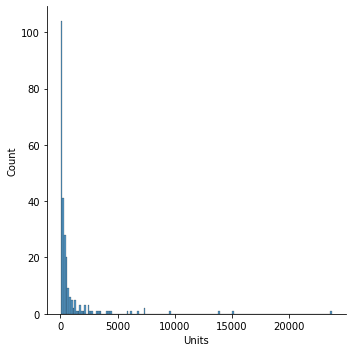

In [7]:
sns.displot(TopResto['Units'])

In [8]:
SalesLarge = TopResto.nlargest(n = 10, columns = 'Sales').sort_values('Sales', ascending = False)
SalesLarge

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger
5,6,Subway,NaN,10200,-2.0%,23801,-4.0%,NaN,Quick Service & Sandwich
6,7,Wendy's,NaN,9762,4.2%,5852,0.7%,NaN,Quick Service & Burger
7,8,Dunkin',"Dunkin' dropped ""Donuts"" from its name and rep...",9228,5.0%,9630,2.2%,NaN,Quick Service & Coffee Cafe
8,9,Domino's,NaN,7044,6.9%,6126,4.3%,NaN,Quick Service & Pizza
9,10,Panera Bread,NaN,5890,4.0%,2160,3.2%,NaN,Fast Casual & Bakery Cafe


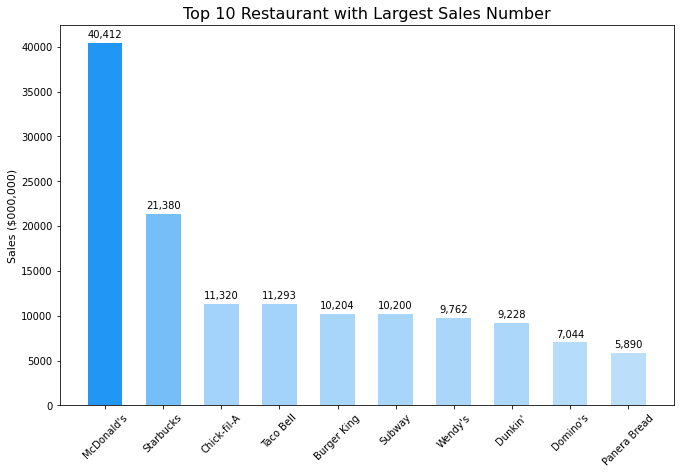

In [9]:
plt.figure(figsize = (11,7))

#Colours - Choose the extreme colours of the colour map
colours = ["#bbdefb", "#2196f3"]

# Colormap - Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list('color map', colours, N = 256)
norm = mpl.colors.Normalize(SalesLarge['Sales'].min(), SalesLarge['Sales'].max()) # linearly normalizes data into the [0.0, 1.0] interval

# Plot bars
bar1 = plt.bar(SalesLarge['Restaurant'], SalesLarge['Sales'], width = 0.6, 
               color=cmap(norm(SalesLarge['Sales'])), zorder = 2) 

# Add label on top of each bar
plt.bar_label(bar1, padding = 3, labels=[f'{e:,.0f}' for e in SalesLarge['Sales']]) 
plt.title('Top 10 Restaurant with Largest Sales Number', size  = 16)
plt.xticks(rotation = 45)


plt.ylabel('Sales ($000,000)', size = 11)
plt.show()

In [10]:
SalesSmall = TopResto.nsmallest(n = 10, columns = 'Sales').sort_values('Sales', ascending = False)
SalesSmall

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
240,241,54th Street Restaurant & Drafthouse,NaN,131,4.5%,31,6.9%,NaN,Varied Menu
241,242,Biggby Coffee,NaN,129,3.8%,240,0.8%,NaN,Coffee Cafe
242,243,Costa Vida Fresh Mexican Grill,NaN,129,5.2%,93,2.2%,NaN,Mexican
243,244,L&L Hawaiian Barbecue,NaN,129,5.1%,195,3.7%,NaN,BBQ
244,245,Gyu-Kaku,NaN,129,18.6%,52,8.3%,NaN,Asian
245,246,Rainforest Cafe,NaN,129,-10.4%,18,-5.3%,NaN,Varied Menu
246,247,PDQ,NaN,127,-5.5%,56,-11.1%,NaN,Chicken
247,248,Lupe Tortilla,NaN,127,12.1%,25,8.7%,NaN,Mexican
248,249,Cook-Out Restaurant,NaN,126,10.1%,270,7.1%,NaN,Burger
249,250,Jollibee,NaN,126,15.2%,40,11.1%,NaN,Chicken


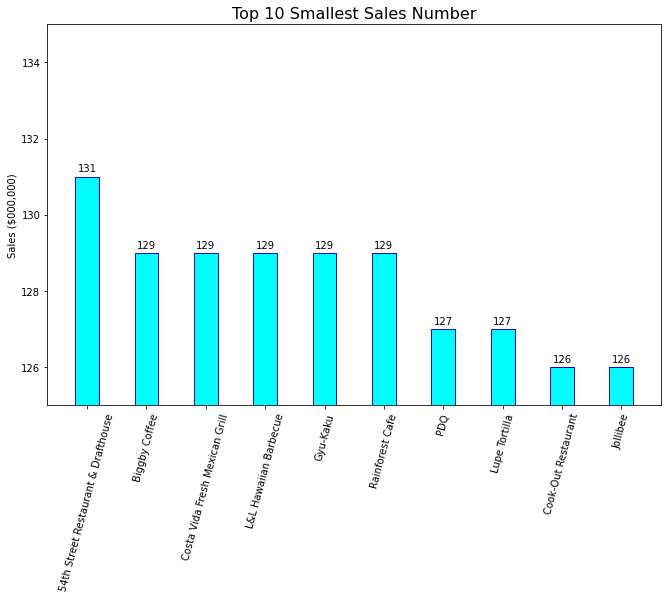

In [11]:
plt.figure(figsize = (11,7))
bar2 = plt.bar(SalesSmall['Restaurant'], SalesSmall['Sales'], width = 0.4,color = 'cyan',
              edgecolor = 'blue')
plt.bar_label(bar2, padding = 3, labels=[f'{e:,.0f}' for e in SalesSmall['Sales']]) 
plt.title('Top 10 Smallest Sales Number', size  = 16)
plt.xticks(rotation = 75)
plt.ylabel('Sales ($000,000)')
plt.ylim(125, 135)
plt.show()

In [12]:
UnitLarge = TopResto.nlargest(n = 10, columns = 'Units').sort_values('Units', ascending = False)
UnitLarge

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
5,6,Subway,NaN,10200,-2.0%,23801,-4.0%,NaN,Quick Service & Sandwich
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
7,8,Dunkin',"Dunkin' dropped ""Donuts"" from its name and rep...",9228,5.0%,9630,2.2%,NaN,Quick Service & Coffee Cafe
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger
10,11,Pizza Hut,The chain moved to replace underperforming din...,5558,0.6%,7306,-2.4%,NaN,Quick Service & Pizza
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
8,9,Domino's,NaN,7044,6.9%,6126,4.3%,NaN,Quick Service & Pizza
6,7,Wendy's,NaN,9762,4.2%,5852,0.7%,NaN,Quick Service & Burger
20,21,Dairy Queen,NaN,3760,2.9%,4381,-0.6%,NaN,Quick Service & Frozen Desserts


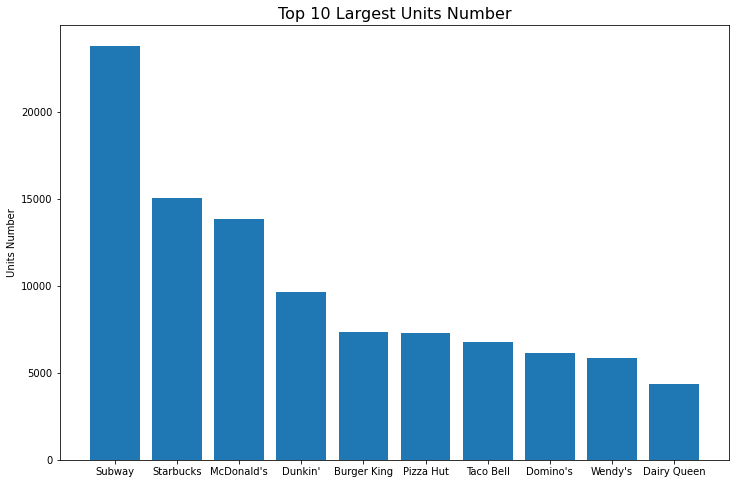

In [13]:
plt.figure(figsize = (12,8))
plt.bar(UnitLarge['Restaurant'], UnitLarge['Units'])
plt.title('Top 10 Largest Units Number', size  = 16)
plt.ylabel('Units Number')
plt.show()

From the table above we can see that top 10 resto with the most units are Quick Service Restaurants and only 9 of them has more than 5000 units

In [14]:
UnitSmall = TopResto.nsmallest(n = 10, columns = 'Units').sort_values('Units', ascending = False)
UnitSmall

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
187,188,Bubba Gump Shrimp Co.,NaN,181,-2.9%,27,0.0%,NaN,Seafood
227,228,Pappasito's Cantina,NaN,143,2.2%,25,0.0%,NaN,Mexican
247,248,Lupe Tortilla,NaN,127,12.1%,25,8.7%,NaN,Mexican
224,225,Eddie V's Prime Seafood,NaN,144,8.1%,21,10.5%,NaN,Seafood
154,155,Mastro's Restaurants,NaN,242,9.7%,18,5.9%,NaN,Steak
245,246,Rainforest Cafe,NaN,129,-10.4%,18,-5.3%,NaN,Varied Menu
232,233,Nobu,NaN,139,9.4%,17,13.3%,NaN,Asian
168,169,Del Frisco's Double Eagle Steak House,NaN,205,12.4%,16,0.0%,NaN,Steak
226,227,Ocean Prime,NaN,144,20.2%,16,6.7%,NaN,Seafood
212,213,Grand Lux Cafe,NaN,157,1.2%,13,0.0%,NaN,Varied Menu


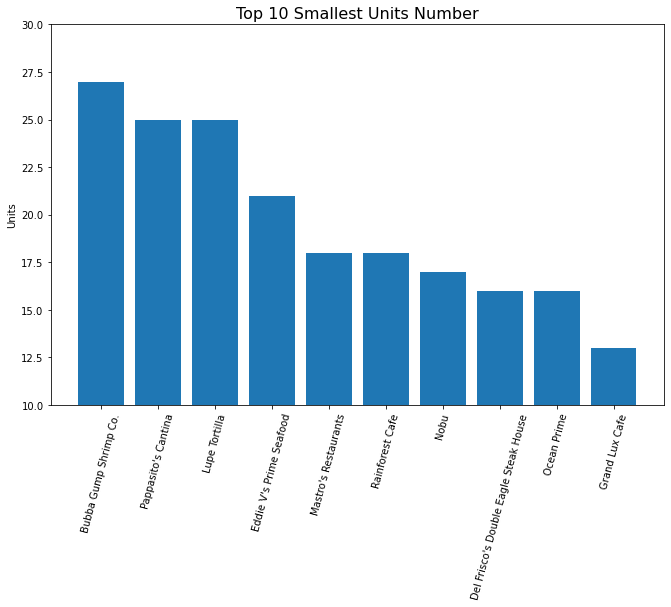

In [15]:
plt.figure(figsize = (11, 7))
plt.bar(UnitSmall['Restaurant'], UnitSmall['Units'])
plt.title('Top 10 Smallest Units Number', size  = 16)
plt.ylabel('Units')
plt.xticks(rotation = 75)
plt.ylim(10, 30)
plt.show()

While, none of the Quick Service restaurants are at the lowest 10 list

In [16]:
Sales_per_Units = (TopResto['Sales']/TopResto['Units'])*1000
TopResto['Sales_per_Units'] = Sales_per_Units
TopResto

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category,Sales_per_Units
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger,2918.676874
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe,1420.692405
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken,4582.995951
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican,1669.080698
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger,1389.055268
...,...,...,...,...,...,...,...,...,...,...
245,246,Rainforest Cafe,NaN,129,-10.4%,18,-5.3%,NaN,Varied Menu,7166.666667
246,247,PDQ,NaN,127,-5.5%,56,-11.1%,NaN,Chicken,2267.857143
247,248,Lupe Tortilla,NaN,127,12.1%,25,8.7%,NaN,Mexican,5080.000000
248,249,Cook-Out Restaurant,NaN,126,10.1%,270,7.1%,NaN,Burger,466.666667


In [17]:
SPLarge = TopResto.nlargest(n = 10, columns = 'Sales_per_Units').sort_values('Sales_per_Units', ascending = False)
SPLarge

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category,Sales_per_Units
154,155,Mastro's Restaurants,NaN,242,9.7%,18,5.9%,NaN,Steak,13444.444444
168,169,Del Frisco's Double Eagle Steak House,NaN,205,12.4%,16,0.0%,NaN,Steak,12812.500000
212,213,Grand Lux Cafe,NaN,157,1.2%,13,0.0%,NaN,Varied Menu,12076.923077
32,33,The Cheesecake Factory,NaN,2180,2.5%,206,2.5%,NaN,Casual Dining & Varied Menu,10582.524272
226,227,Ocean Prime,NaN,144,20.2%,16,6.7%,NaN,Seafood,9000.000000
119,120,Cooper's Hawk Winery & Restaurants,NaN,338,19.9%,41,17.1%,"Countryside, IL",Varied Menu,8243.902439
232,233,Nobu,NaN,139,9.4%,17,13.3%,NaN,Asian,8176.470588
88,89,Portillo's,NaN,505,12.2%,62,8.8%,NaN,Fast Casual & Sandwich,8145.161290
95,96,The Capital Grille,NaN,461,4.7%,58,0.0%,NaN,Fine Dining & Steak,7948.275862
104,105,Maggiano's Little Italy,NaN,417,1.1%,53,1.9%,"Dallas, TX",Italian/Pizza,7867.924528


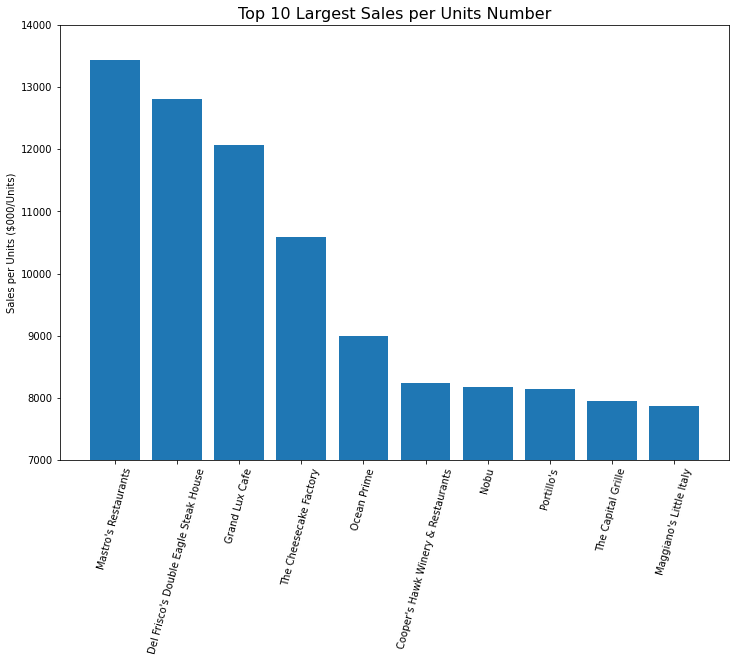

In [18]:
plt.figure(figsize = (12,8))
plt.bar(SPLarge['Restaurant'], SPLarge['Sales_per_Units'])
plt.xticks(rotation = 75)
plt.title('Top 10 Largest Sales per Units Number', size  = 16)
plt.ylabel('Sales per Units ($000/Units)')
plt.ylim(7000, 14000)
plt.show()

In [19]:
SPSmall = TopResto.nsmallest(n = 10, columns = 'Sales_per_Units').sort_values('Sales_per_Units', ascending = False)
SPSmall

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category,Sales_per_Units
152,153,Godfather's Pizza,NaN,250,4.9%,569,3.8%,NaN,Pizza,439.367311
80,81,Auntie Anne's,NaN,559,0.2%,1288,-0.5%,NaN,Quick Service & Snack,434.006211
5,6,Subway,NaN,10200,-2.0%,23801,-4.0%,NaN,Quick Service & Sandwich,428.553422
111,112,Cold Stone Creamery,NaN,369,-2.3%,895,-0.9%,"Scottsdale, AZ",Frozen Desserts,412.290503
159,160,A&W All-American Food,The chain's 100th birthday found it working to...,227,1.8%,575,-6.5%,NaN,Burger,394.782609
231,232,Great American Cookies,NaN,142,2.7%,368,2.2%,NaN,Snack,385.869565
220,221,Menchie's Frozen Yogurt,NaN,149,-3.1%,416,-2.1%,NaN,Frozen Desserts,358.173077
238,239,Daylight Donuts,NaN,132,2.2%,415,0.2%,NaN,Snack,318.072289
72,73,Baskin-Robbins,NaN,615,0.6%,2524,-1.0%,NaN,Quick Service & Frozen Desserts,243.660856
170,171,Cinnabon,NaN,201,5.6%,956,3.5%,NaN,Snack,210.251046


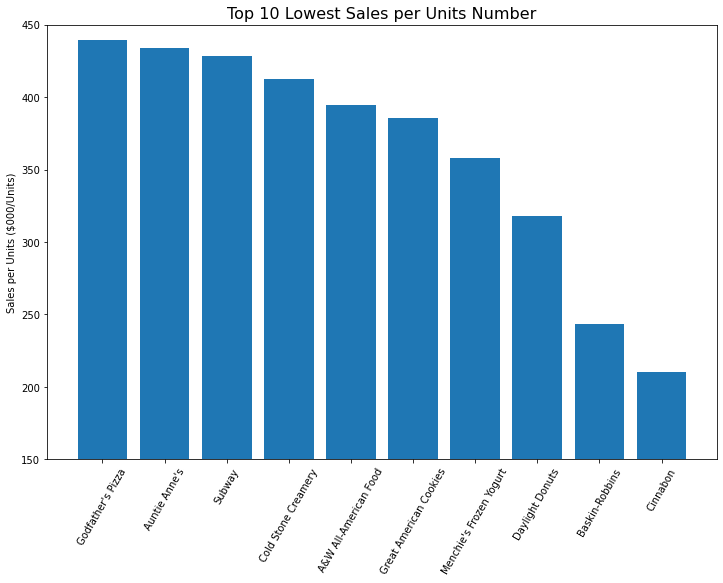

In [20]:
plt.figure(figsize = (12,8))
plt.bar(SPSmall['Restaurant'], SPSmall['Sales_per_Units'])
plt.xticks(rotation = 60)
plt.title('Top 10 Lowest Sales per Units Number', size  = 16)
plt.ylabel('Sales per Units ($000/Units)')
plt.ylim(150, 450)
plt.show()

### b. Top 10 Growth

In [21]:
TopResto['YOY_Sales'] = TopResto['YOY_Sales'].apply(lambda x:x.replace('%', ''))
TopResto['YOY_Units'] = TopResto['YOY_Units'].apply(lambda x:x.replace('%', ''))
TopResto['YOY_Sales'] = pd.to_numeric(TopResto['YOY_Sales'])
TopResto['YOY_Units'] = pd.to_numeric(TopResto['YOY_Units'])

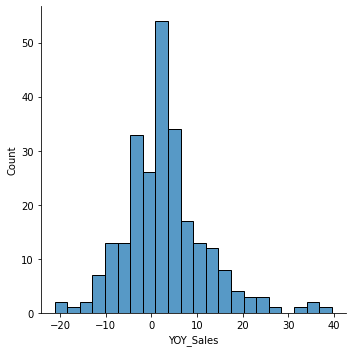

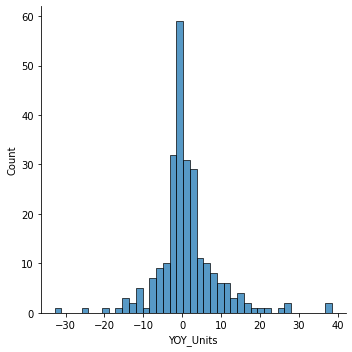

In [22]:
sns.displot(TopResto['YOY_Sales'])
sns.displot(TopResto['YOY_Units'])

In [23]:
GrowthSalesLarge = TopResto.nlargest(n = 10, columns = 'YOY_Sales').sort_values('YOY_Sales', ascending = False)
GrowthSalesLarge

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category,Sales_per_Units
214,215,Chicken Salad Chick,Benefiting from being perhaps the only chain f...,153,39.5,144,38.5,NaN,Chicken,1062.500000
200,201,Metro Diner,NaN,171,36.3,69,3.0,NaN,Family Style,2478.260870
81,82,First Watch,NaN,558,35.1,368,24.7,NaN,Family Dining & Family Style,1516.304348
70,71,Shake Shack,NaN,622,31.8,173,27.2,NaN,Fast Casual & Burger,3595.375723
235,236,Walk-On's Sports Bistreaux,NaN,133,27.8,33,37.5,NaN,Sports Bar,4030.303030
234,235,Mission BBQ,NaN,136,25.0,90,21.6,NaN,BBQ,1511.111111
41,42,Raising Cane's Chicken Fingers,NaN,1466,23.8,457,14.3,NaN,Fast Casual & Chicken,3207.877462
92,93,MOD Pizza,NaN,483,23.8,467,18.2,NaN,Fast Casual & Pizza,1034.261242
76,77,Tropical Smoothie Cafe,NaN,576,21.8,834,16.0,NaN,Quick Service & Beverage,690.647482
165,166,Lazy Dog Restaurant & Bar,NaN,213,21.3,36,20.0,NaN,Varied Menu,5916.666667


In [24]:
GrowthUnitsLarge = TopResto.nlargest(n = 10, columns = 'YOY_Units').sort_values('YOY_Units', ascending = False)
GrowthUnitsLarge

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category,Sales_per_Units
214,215,Chicken Salad Chick,Benefiting from being perhaps the only chain f...,153,39.5,144,38.5,NaN,Chicken,1062.500000
235,236,Walk-On's Sports Bistreaux,NaN,133,27.8,33,37.5,NaN,Sports Bar,4030.303030
178,179,True Food Kitchen,The health-focused chain with a rotating menu ...,190,13.8,32,28.0,NaN,Varied Menu,5937.500000
70,71,Shake Shack,NaN,622,31.8,173,27.2,NaN,Fast Casual & Burger,3595.375723
81,82,First Watch,NaN,558,35.1,368,24.7,NaN,Family Dining & Family Style,1516.304348
234,235,Mission BBQ,NaN,136,25.0,90,21.6,NaN,BBQ,1511.111111
165,166,Lazy Dog Restaurant & Bar,NaN,213,21.3,36,20.0,NaN,Varied Menu,5916.666667
92,93,MOD Pizza,NaN,483,23.8,467,18.2,NaN,Fast Casual & Pizza,1034.261242
119,120,Cooper's Hawk Winery & Restaurants,NaN,338,19.9,41,17.1,"Countryside, IL",Varied Menu,8243.902439
76,77,Tropical Smoothie Cafe,NaN,576,21.8,834,16.0,NaN,Quick Service & Beverage,690.647482


In [25]:
GrowthSalesSmall = TopResto.nsmallest(n = 10, columns = 'YOY_Sales').sort_values('YOY_Sales', ascending = False)
GrowthSalesSmall

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category,Sales_per_Units
245,246,Rainforest Cafe,NaN,129,-10.4,18,-5.3,NaN,Varied Menu,7166.666667
61,62,Ruby Tuesday,NaN,731,-11.4,451,-8.1,NaN,Casual Dining & Varied Menu,1620.842572
192,193,Taco Bueno,NaN,178,-12.4,145,-12.1,NaN,Mexican,1227.586207
143,144,Pei Wei Asian Diner,NaN,268,-12.5,150,-16.7,"Irving, TX",Asian/Noodle,1786.666667
171,172,Uno Pizzeria & Grill,NaN,196,-12.9,85,-14.1,NaN,Italian/Pizza,2305.882353
167,168,Friendly's,The family-dining chain closed many underperfo...,210,-15.3,160,-20.4,NaN,Family Style,1312.500000
211,212,McCormick & Schmick's,NaN,157,-15.6,35,-14.6,NaN,Seafood,4485.714286
182,183,Fuddruckers,NaN,185,-15.8,138,-11.5,NaN,Burger,1340.579710
230,231,Old Country Buffet/HomeTown Buffet,NaN,142,-18.8,49,-24.6,NaN,Family Casual,2897.959184
229,230,Houlihan's,The chain filed for bankruptcy in November and...,143,-21.2,45,-32.8,NaN,Varied Menu,3177.777778


In [26]:
GrowthUnitSmall = TopResto.nsmallest(n = 10, columns = 'YOY_Units').sort_values('YOY_Units', ascending = False)
GrowthUnitSmall

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category,Sales_per_Units
182,183,Fuddruckers,NaN,185,-15.8,138,-11.5,NaN,Burger,1340.579710
192,193,Taco Bueno,NaN,178,-12.4,145,-12.1,NaN,Mexican,1227.586207
82,83,Perkins Restaurant & Bakery,After its parent company filed for Chapter 11 ...,541,-9.5,309,-13.0,NaN,Family Dining & Family Style,1750.809061
89,90,Boston Market,NaN,501,-9.9,390,-14.1,NaN,Fast Casual & Chicken,1284.615385
171,172,Uno Pizzeria & Grill,NaN,196,-12.9,85,-14.1,NaN,Italian/Pizza,2305.882353
211,212,McCormick & Schmick's,NaN,157,-15.6,35,-14.6,NaN,Seafood,4485.714286
143,144,Pei Wei Asian Diner,NaN,268,-12.5,150,-16.7,"Irving, TX",Asian/Noodle,1786.666667
167,168,Friendly's,The family-dining chain closed many underperfo...,210,-15.3,160,-20.4,NaN,Family Style,1312.500000
230,231,Old Country Buffet/HomeTown Buffet,NaN,142,-18.8,49,-24.6,NaN,Family Casual,2897.959184
229,230,Houlihan's,The chain filed for bankruptcy in November and...,143,-21.2,45,-32.8,NaN,Varied Menu,3177.777778


## 2. Potential Restaurants

In [27]:
PotentResto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         50 non-null     int64 
 1   Restaurant   50 non-null     object
 2   Location     50 non-null     object
 3   Sales        50 non-null     int64 
 4   YOY_Sales    50 non-null     object
 5   Units        50 non-null     int64 
 6   YOY_Units    50 non-null     object
 7   Unit_Volume  50 non-null     int64 
 8   Franchising  50 non-null     object
dtypes: int64(4), object(5)
memory usage: 3.6+ KB


### a. Top 10 Condition

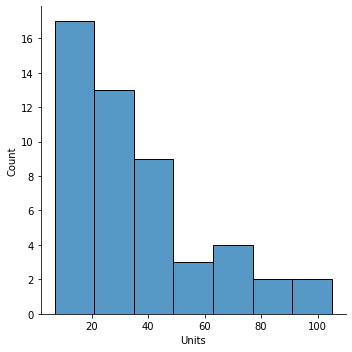

In [28]:
sns.displot(PotentResto['Units'])

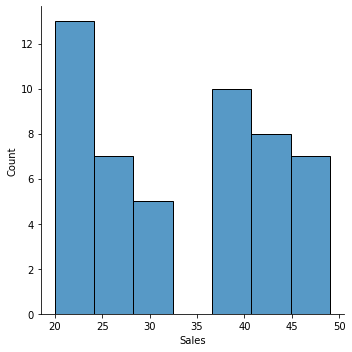

In [29]:
sns.displot(PotentResto['Sales'])

In [30]:
Franchise = PotentResto['Franchising'].value_counts().index
Count = PotentResto['Franchising'].value_counts()

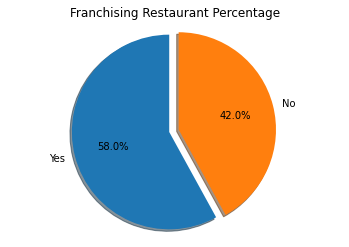

In [31]:
plt.figure(figsize = (6,4))
plt.pie(Count, labels = Franchise, explode = (0, 0.1), 
        autopct = '%.1f%%', shadow = True, startangle = 90)
plt.title('Franchising Restaurant Percentage')
plt.axis('equal')
plt.show()

In [32]:
PotentSalesLarge = PotentResto.nsmallest(n = 10, columns = 'Unit_Volume').sort_values('Unit_Volume', ascending = False)
PotentSalesLarge

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
6,7,The Simple Greek,"Blue Bell, Pa.",24,52.5%,36,33.3%,775,Yes
23,24,Joe & The Juice,"New York, N.Y.",47,25.9%,69,25.5%,760,Yes
16,17,Ike's Love & Sandwiches,"San Francisco, Calif.",44,30.8%,71,29.1%,700,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
5,6,Playa Bowls,"Belmar, N.J.",39,62.9%,76,28.8%,580,Yes
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
17,18,Vitality Bowls,"San Ramon, Calif.",37,30.1%,77,24.2%,535,Yes
41,42,The Human Bean,"Medford, Ore.",47,19.0%,97,19.8%,535,Yes
21,22,Duck Donuts,"Mechanicsburg, Pa.",44,28.0%,90,16.9%,530,Yes
8,9,Creamistry,"Yorba Linda, Calif.",24,36.8%,60,27.7%,465,Yes


### b. Top 10 Growth

In [33]:
PotentResto['YOY_Sales'] = PotentResto['YOY_Sales'].apply(lambda x:x.replace('%', ''))
PotentResto['YOY_Units'] = PotentResto['YOY_Units'].apply(lambda x:x.replace('%', ''))
PotentResto['YOY_Sales'] = pd.to_numeric(PotentResto['YOY_Sales'])
PotentResto['YOY_Units'] = pd.to_numeric(PotentResto['YOY_Units'])

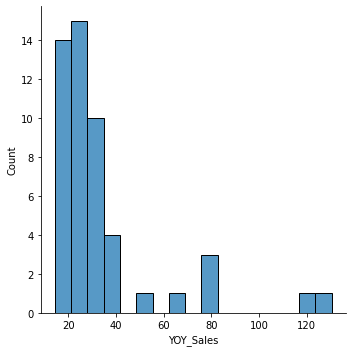

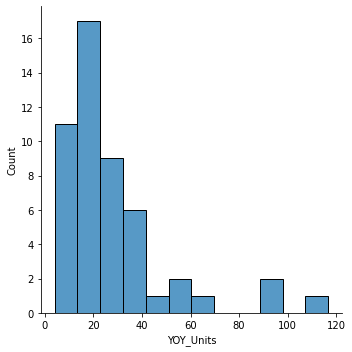

In [34]:
sns.displot(PotentResto['YOY_Sales'])
sns.displot(PotentResto['YOY_Units'])

In [35]:
PotentGrowthSalesLarge = PotentResto.nlargest(n = 10, columns = 'YOY_Sales').sort_values('YOY_Sales', ascending = False)
PotentGrowthSalesLarge

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5,26,116.7,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9,105,94.4,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0,21,90.9,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7,46,58.6,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1,50,56.3,1210,Yes
5,6,Playa Bowls,"Belmar, N.J.",39,62.9,76,28.8,580,Yes
6,7,The Simple Greek,"Blue Bell, Pa.",24,52.5,36,33.3,775,Yes
7,8,Melt Shop,"New York, N.Y.",20,39.6,19,35.7,1260,Yes
8,9,Creamistry,"Yorba Linda, Calif.",24,36.8,60,27.7,465,Yes
9,10,Joella's Hot Chicken,"Louisville, Ky.",29,35.5,17,30.8,1930,No


In [36]:
PotentSalesLarge = PotentResto.nlargest(n = 10, columns = 'Sales').sort_values('Sales', ascending = False)
PotentSalesLarge

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
4,5,Pokeworks,"Irvine, Calif.",49,77.1,50,56.3,1210,Yes
40,41,Blue Sushi Sake Grill,"Omaha, Neb.",49,19.5,14,16.7,3500,No
13,14,Bluestone Lane,"New York, N.Y.",48,33.0,48,37.1,1175,No
45,46,LA Crawfish,"McAllen, Texas",48,17.6,25,13.6,2050,Yes
23,24,Joe & The Juice,"New York, N.Y.",47,25.9,69,25.5,760,Yes
41,42,The Human Bean,"Medford, Ore.",47,19.0,97,19.8,535,Yes
46,47,&pizza,"Washington, D.C.",45,17.1,35,9.4,1350,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9,105,94.4,560,Yes
16,17,Ike's Love & Sandwiches,"San Francisco, Calif.",44,30.8,71,29.1,700,Yes
21,22,Duck Donuts,"Mechanicsburg, Pa.",44,28.0,90,16.9,530,Yes


In [37]:
PotentGrowthUnitsLarge = PotentResto.nlargest(n = 10, columns = 'YOY_Units').sort_values('YOY_Units', ascending = False)
PotentGrowthUnitsLarge

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5,26,116.7,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9,105,94.4,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0,21,90.9,1370,Yes
12,13,Teriyaki Madness,"Denver, Colo.",41,34.1,63,65.8,890,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7,46,58.6,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1,50,56.3,1210,Yes
11,12,Dog Haus,"Pasadena, Calif.",39,34.5,50,42.9,1200,Yes
18,19,Hawkers Asian Street Fare,"Orlando, Fla.",22,30.0,7,40.0,3800,No
13,14,Bluestone Lane,"New York, N.Y.",48,33.0,48,37.1,1175,No
10,11,Eggs Up Grill,"Spartanburg, S.C.",30,35.4,41,36.7,860,Yes


In [38]:
PotentUnitsLarge = PotentResto.nlargest(n = 10, columns = 'Units').sort_values('Units', ascending = False)
PotentUnitsLarge

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
1,2,Clean Juice,"Charlotte, N.C.",44,121.9,105,94.4,560,Yes
41,42,The Human Bean,"Medford, Ore.",47,19.0,97,19.8,535,Yes
21,22,Duck Donuts,"Mechanicsburg, Pa.",44,28.0,90,16.9,530,Yes
17,18,Vitality Bowls,"San Ramon, Calif.",37,30.1,77,24.2,535,Yes
5,6,Playa Bowls,"Belmar, N.J.",39,62.9,76,28.8,580,Yes
16,17,Ike's Love & Sandwiches,"San Francisco, Calif.",44,30.8,71,29.1,700,Yes
23,24,Joe & The Juice,"New York, N.Y.",47,25.9,69,25.5,760,Yes
12,13,Teriyaki Madness,"Denver, Colo.",41,34.1,63,65.8,890,Yes
8,9,Creamistry,"Yorba Linda, Calif.",24,36.8,60,27.7,465,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1,50,56.3,1210,Yes


In [39]:
PotentSalesLarge['Restaurant']

4                   Pokeworks
40      Blue Sushi Sake Grill
13             Bluestone Lane
45                LA Crawfish
23            Joe & The Juice
41             The Human Bean
46                     &pizza
1                 Clean Juice
16    Ike's Love & Sandwiches
21                Duck Donuts
Name: Restaurant, dtype: object

In [40]:
PotentGrowthSalesLarge['Restaurant']

0              Evergreens
1             Clean Juice
2                Slapfish
3              Clean Eatz
4               Pokeworks
5             Playa Bowls
6        The Simple Greek
7               Melt Shop
8              Creamistry
9    Joella's Hot Chicken
Name: Restaurant, dtype: object

In [41]:
PotentUnitsLarge['Restaurant']

1                 Clean Juice
41             The Human Bean
21                Duck Donuts
17             Vitality Bowls
5                 Playa Bowls
16    Ike's Love & Sandwiches
23            Joe & The Juice
12           Teriyaki Madness
8                  Creamistry
4                   Pokeworks
Name: Restaurant, dtype: object

In [42]:
PotentGrowthUnitsLarge['Restaurant']

0                    Evergreens
1                   Clean Juice
2                      Slapfish
12             Teriyaki Madness
3                    Clean Eatz
4                     Pokeworks
11                     Dog Haus
18    Hawkers Asian Street Fare
13               Bluestone Lane
10                Eggs Up Grill
Name: Restaurant, dtype: object

## 3. Independent Restaurant

In [43]:
IndepResto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           100 non-null    int64  
 1   Restaurant     100 non-null    object 
 2   Sales          100 non-null    float64
 3   Average Check  100 non-null    int64  
 4   City           100 non-null    object 
 5   State          100 non-null    object 
 6   Meals Served   100 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [44]:
Counts = IndepResto['City'].value_counts()
Labels = IndepResto['City'].value_counts().index

def group_lower_ranking_values(column):
    rating_counts = df.groupby(column).agg(count)

def group_lower_ranking_values(column):
    rating_counts = df.groupby(column).agg('count')
    pct_value = rating_counts[lambda x: x.columns[0]].quantile(.75)
    values_below_pct_value = rating_counts[lambda x: x.columns[0]].loc[lambda s: s < pct_value].index.values
    def fix_values(row):
        if row[column] in values_below_pct_value:
            row[column] = 'Other'
        return row 
    rating_grouped = df.apply(fix_values, axis=1).groupby(column).agg('count')
    return rating_grouped

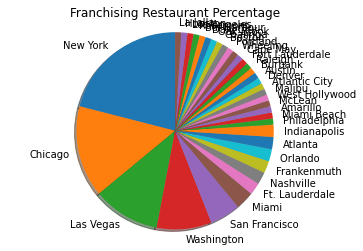

In [45]:
plt.figure(figsize = (6,4))
plt.pie(Counts, labels = Labels, shadow = True, startangle = 90, )
plt.title('Franchising Restaurant Percentage')
plt.axis('equal')
plt.show()

In [46]:
IndepMealsLarge = IndepResto.nlargest(n = 10, columns = 'Meals Served').sort_values('Meals Served', ascending = False)
IndepMealsLarge

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served
57,58,Zehnder's of Frankenmuth,16063684.0,17,Frankenmuth,Mich.,959026.0
13,14,Junior's (Times Square),23640652.0,23,New York,N.Y.,914500.0
49,50,Frankenmuth Bavarian Inn,17388751.0,19,Frankenmuth,Mich.,899284.0
2,3,Old Ebbitt Grill,29104017.0,33,Washington,D.C.,892830.0
1,2,The Boathouse Orlando,35218364.0,43,Orlando,Fla.,820819.0
42,43,Junior's (49th Street),17834390.0,22,New York,N.Y.,798000.0
14,15,The Hamilton,23138062.0,33,Washington,D.C.,700861.0
41,42,"Founding Farmers (Washington, D.C.)",17910045.0,33,Washington,D.C.,648096.0
29,30,Bob Chinn's Crab House,18687601.0,48,Wheeling,Ill.,625907.0
46,47,Harris Ranch Inn & Restaurant,17599468.0,29,Coalinga,Calif.,611928.0


In [47]:
IndepSalesLarge = IndepResto.nlargest(n = 10, columns = 'Sales').sort_values('Sales', ascending = False)
IndepSalesLarge

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served
0,1,Carmine's (Times Square),39080335.0,40,New York,N.Y.,469803.0
1,2,The Boathouse Orlando,35218364.0,43,Orlando,Fla.,820819.0
2,3,Old Ebbitt Grill,29104017.0,33,Washington,D.C.,892830.0
3,4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,N.Y.,198500.0
4,5,Bryant Park Grill & Cafe,26900000.0,62,New York,N.Y.,403000.0
5,6,Gibsons Bar & Steakhouse,25409952.0,80,Chicago,Ill.,348567.0
6,7,Top of the World at the STRAT,25233543.0,103,Las Vegas,Nev.,246054.0
7,8,Maple & Ash,24837595.0,99,Chicago,Ill.,210832.0
8,9,Balthazar,24547800.0,87,New York,N.Y.,519000.0
9,10,Smith & Wollensky,24501000.0,107,New York,N.Y.,257364.0


In [48]:
Meals_Price = (IndepResto['Sales']/IndepResto['Meals Served'])
IndepResto['Meals Price'] = Meals_Price
IndepResto

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served,Meals Price
0,1,Carmine's (Times Square),39080335.0,40,New York,N.Y.,469803.0,83.184516
1,2,The Boathouse Orlando,35218364.0,43,Orlando,Fla.,820819.0,42.906370
2,3,Old Ebbitt Grill,29104017.0,33,Washington,D.C.,892830.0,32.597490
3,4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,N.Y.,198500.0,135.597884
4,5,Bryant Park Grill & Cafe,26900000.0,62,New York,N.Y.,403000.0,66.749380
...,...,...,...,...,...,...,...,...
95,96,George's at the Cove,12194000.0,80,La Jolla,Calif.,250000.0,48.776000
96,97,Le Coucou,12187523.0,95,New York,N.Y.,87070.0,139.973849
97,98,Mi Vida,12032014.0,38,Washington,D.C.,226226.0,53.185814
98,99,Upland,11965564.0,52,New York,N.Y.,171825.0,69.638085


In [49]:
IndepPriceLarge = IndepResto.nlargest(n = 10, columns = 'Meals Price').sort_values('Meals Price', ascending = False)
IndepPriceLarge

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served,Meals Price
31,32,Del Posto,18625033.0,194,New York,N.Y.,95000.0,196.052979
37,38,Prime Steakhouse,18248030.0,173,Las Vegas,Nev.,113600.0,160.634067
36,37,Lavo Italian Restaurant & Lounge,18386262.0,97,Las Vegas,Nev.,115500.0,159.188416
21,22,SW Steakhouse,21523650.0,149,Las Vegas,Nev.,145700.0,147.725806
96,97,Le Coucou,12187523.0,95,New York,N.Y.,87070.0,139.973849
3,4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,N.Y.,198500.0,135.597884
63,64,Prime & Provisions,15100000.0,130,Chicago,Ill.,116154.0,129.999828
55,56,Delmonico Steakhouse,16154000.0,103,Las Vegas,Nev.,133000.0,121.458647
7,8,Maple & Ash,24837595.0,99,Chicago,Ill.,210832.0,117.807520
20,21,Bazaar Meat by Jose Andres,22181607.0,119,Las Vegas,Nev.,190000.0,116.745300
